# EDA and Data Preprocessing

## Load modules

In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from src.loader import ComplaintLoader
from src.preprocessor import ComplaintPreprocessor
from src.visualizer import ComplaintVisualizer

## Load Data

In [2]:
INPUT_PATH = '../data/raw/complaints.csv'
OUTPUT_PATH = '../data/processed/filtered_complaints.csv'

cols_to_load = [
    'Date received', 'Product', 'Consumer complaint narrative',
    'Issue', 'Company', 'State', 'Complaint ID',
]

In [3]:
loader = ComplaintLoader(INPUT_PATH, cols_to_load)
raw_df = loader.load_data()

[Loader] Loading data from ../data/raw/complaints.csv in chunks...
  Processed chunk 0...
  Processed chunk 10...
  Processed chunk 20...
  Processed chunk 30...
  Processed chunk 40...
  Processed chunk 50...
  Processed chunk 60...
  Processed chunk 70...
  Processed chunk 80...
  Processed chunk 90...
  Processed chunk 100...
  Processed chunk 110...
  Processed chunk 120...
  Processed chunk 130...
  Processed chunk 140...
  Processed chunk 150...
  Processed chunk 160...
  Processed chunk 170...
  Processed chunk 180...
  Processed chunk 190...
[Loader] Concatenating valid chunks...
[Loader] Successfully loaded 2,980,756 rows with narratives.


## Preprocessing Data

In [4]:
processor = ComplaintPreprocessor(raw_df)

clean_df = (
    processor.filter_missing_narratives()
    .map_products()
    .clean_narratives()
    .get_data()
)
print(f"Final Cleaned Data Shape: {clean_df.shape}")
clean_df.head(3)

[Preprocessing] Dropped 0 rows missing narratives.
[Preprocessing] Filtered to target product categories. Current rows: 486,626
[Preprocessing] Cleaning text narratives (this may take a moment)...
Final Cleaned Data Shape: (486622, 9)


,Date received,Product,Issue,Consumer complaint narrative,Company,State,Complaint ID,CrediTrust_Product,cleaned_narrative
4,2025-06-13,Credit card,Getting a credit card,A XXXX XXXX card was opened under my name by a...,"CITIBANK, N.A.",TX,14069121,Credit Cards,a card was opened under my name by a fraudster...
5,2025-06-13,Checking or savings account,Managing an account,I made the mistake of using my wellsfargo debi...,WELLS FARGO & COMPANY,ID,14061897,Savings Accounts,i made the mistake of using my wellsfargo debi...
6,2025-06-12,Credit card,"Other features, terms, or problems","Dear CFPB, I have a secured credit card with c...","CITIBANK, N.A.",NY,14047085,Credit Cards,dear cfpb i have a secured credit card with ci...


## Visualization

/home/bini/Documents/repos/Complaint-Analysis-For-Financial-Services/src/visualizer.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


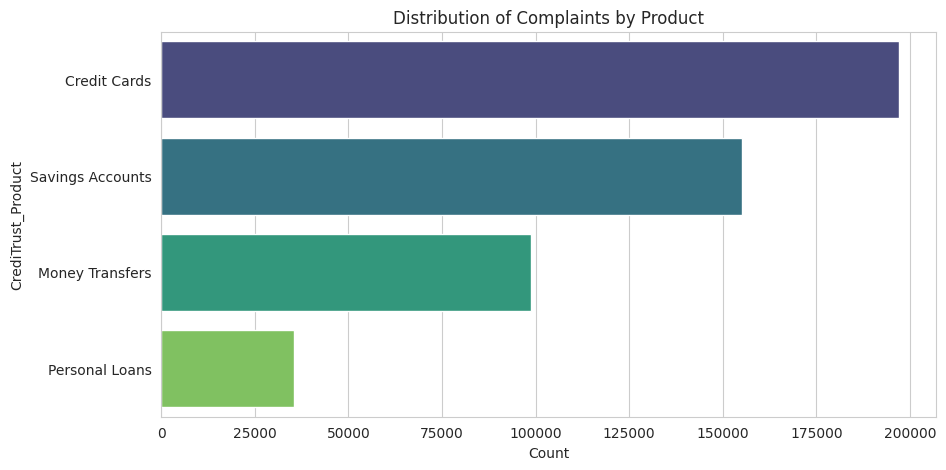

In [6]:
viz = ComplaintVisualizer(clean_df)
viz.plot_product_distribution()


[Statistics] Avg Word Count: 193
[Statistics] Max Word Count: 6236


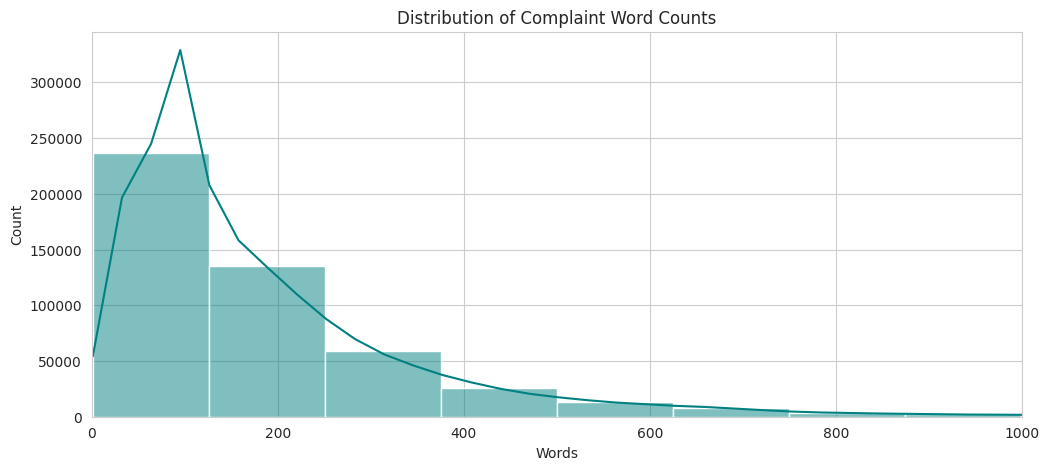

In [9]:
viz.analyze_word_counts()

## Save Processed Data

In [8]:
clean_df.to_csv(OUTPUT_PATH, index=False)
print(f"Saved processed data to {OUTPUT_PATH}")

Saved processed data to ../data/processed/filtered_complaints.csv
